In [6]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

In [7]:
# Set the working directory
os.chdir('D:\\Assignments_SCMA632')
print(f"Current working directory: {os.getcwd()}")

Current working directory: D:\Assignments_SCMA632


In [9]:
# Load the dataset
data = pd.read_csv("NSSO68.csv")

C:\Users\jyoth\AppData\Local\Temp\ipykernel_26104\95208774.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NSSO68.csv")


In [9]:
# Load the dataset
data = pd.read_csv("NSSO68.csv")

C:\Users\jyoth\AppData\Local\Temp\ipykernel_26104\95208774.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NSSO68.csv")


In [10]:
# Display unique values in the 'state_1' column
unique_states = data['state_1'].unique()
print(f"Unique states: {unique_states}")

Unique states: ['GUJ' 'ORI' 'CHTSD' 'MP' 'JRKD' 'WB' 'AP' 'MH' 'D&D' 'D&NH' 'MIZ' 'TRPR'
 'MANPR' 'ASSM' 'MEG' 'NAG' 'A&N' 'PNDCRY' 'TN' 'GOA' 'KA' 'KE' 'LKSDP'
 'SKM' 'Bhr' 'UP' 'RJ' 'ARP' 'DL' 'HR' 'Pun' 'HP' 'UT' 'Chandr' 'J$K']


In [11]:
# Filter and select specific columns from the data
subset_data = data[data['state_1'] == 'MANPR'][['foodtotal_q', 'MPCE_MRP', 'MPCE_URP', 'Age', 'Meals_At_Home', 'Possess_ration_card', 'Education', 'No_of_Meals_per_day']]
print("Subset data:")
print(subset_data.head())

Subset data:
       foodtotal_q  MPCE_MRP  MPCE_URP  Age  Meals_At_Home  \
16453    16.687750   1475.07   1485.00   45           60.0   
16454    19.600145   1481.53   1304.00   45           60.0   
16455    16.250121    808.97    735.00   50           60.0   
16456    16.333450    796.43    699.17   45           60.0   
16457    16.333450    799.59    690.00   47           60.0   

       Possess_ration_card  Education  No_of_Meals_per_day  
16453                  2.0       10.0                  2.0  
16454                  2.0       11.0                  2.0  
16455                  2.0       10.0                  2.0  
16456                  2.0       10.0                  2.0  
16457                  2.0       10.0                  2.0  


In [12]:
# Check for missing values in the subset_data
print("Missing values in subset_data:")
print(subset_data.isna().sum())

Missing values in subset_data:
foodtotal_q            0
MPCE_MRP               0
MPCE_URP               0
Age                    0
Meals_At_Home          7
Possess_ration_card    2
Education              0
No_of_Meals_per_day    0
dtype: int64


In [13]:
# Impute missing values with mean values
imputer = SimpleImputer(strategy='mean')
subset_data['Possess_ration_card'] = imputer.fit_transform(subset_data[['Possess_ration_card']])
subset_data['MPCE_URP'] = imputer.fit_transform(subset_data[['MPCE_URP']])
subset_data['Age'] = imputer.fit_transform(subset_data[['Age']])
subset_data['Meals_At_Home'] = imputer.fit_transform(subset_data[['Meals_At_Home']])
subset_data['Education'] = imputer.fit_transform(subset_data[['Education']])


In [14]:
# Check if missing values are imputed
print("Missing values after imputation:")
print(subset_data.isna().sum())

Missing values after imputation:
foodtotal_q            0
MPCE_MRP               0
MPCE_URP               0
Age                    0
Meals_At_Home          0
Possess_ration_card    0
Education              0
No_of_Meals_per_day    0
dtype: int64


In [15]:
# Check for infinite values
print("Check for infinite values in subset_data:")
print(np.isinf(subset_data).sum())

Check for infinite values in subset_data:
foodtotal_q            0
MPCE_MRP               0
MPCE_URP               0
Age                    0
Meals_At_Home          0
Possess_ration_card    0
Education              0
No_of_Meals_per_day    0
dtype: int64


In [16]:
# Drop rows with any remaining missing or infinite values
subset_data = subset_data.replace([np.inf, -np.inf], np.nan).dropna()

In [17]:
# Fit the regression model
X = subset_data[['MPCE_URP', 'Age', 'Meals_At_Home', 'Possess_ration_card', 'Education']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = subset_data['foodtotal_q']

In [18]:
# Fit the model
model = sm.OLS(y, X).fit()

In [19]:
# Print the regression results
print("Regression results:")
print(model.summary())

Regression results:
                            OLS Regression Results                            
Dep. Variable:            foodtotal_q   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          4.24e-148
Time:                        21:44:17   Log-Likelihood:                -6917.2
No. Observations:                2560   AIC:                         1.385e+04
Df Residuals:                    2554   BIC:                         1.388e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt 

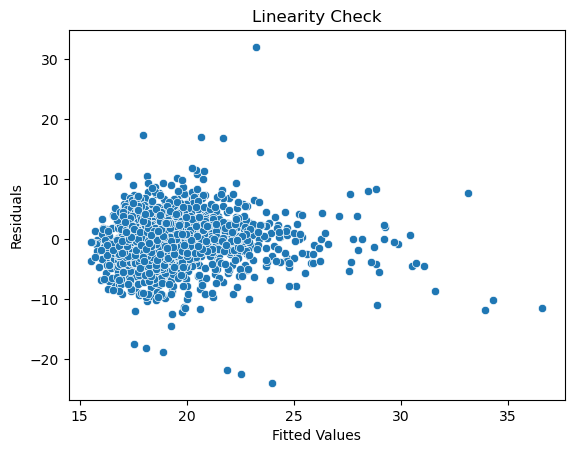

In [21]:
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check')
plt.show()

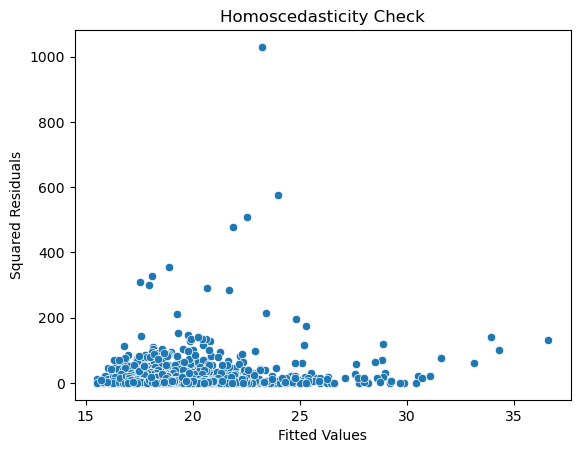

In [22]:
sns.scatterplot(x=model.fittedvalues, y=model.resid**2)
plt.xlabel('Fitted Values')
plt.ylabel('Squared Residuals')
plt.title('Homoscedasticity Check')
plt.show()

C:\Users\jyoth\AppData\Local\Temp\ipykernel_26104\609243755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model.resid, kde=False)


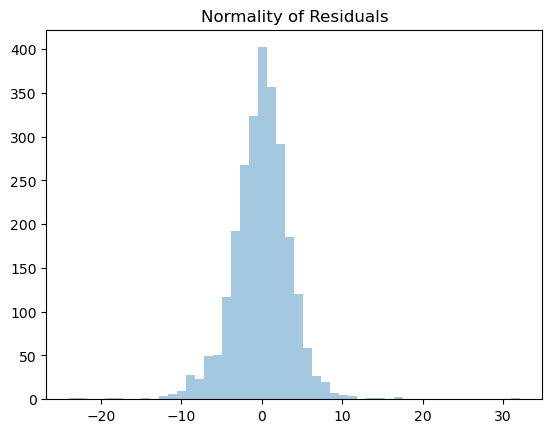

In [23]:
sns.distplot(model.resid, kde=False)
plt.title('Normality of Residuals')
plt.show()

In [15]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF data:")
print(vif_data)

VIF data:
               feature         VIF
0                const  197.614659
1             MPCE_URP    1.129292
2                  Age    1.102615
3        Meals_At_Home    1.027401
4  Possess_ration_card    1.041067
5            Education    1.217741


In [25]:
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 1.094358823822764


In [16]:
# Extract the coefficients from the model
coefficients = model.params

In [18]:
# Construct the equation
equation = f"y = {coefficients[0]:.2f}"
for i in range(1, len(coefficients)):
    equation += f" + {coefficients[i]:.6f}*x{i}"
print("Regression equation:")
print(equation)

Regression equation:
y = 12.79 + 0.003028*x1 + 0.030178*x2 + 0.039740*x3 + -0.585617*x4 + -0.109305*x5


C:\Users\jyoth\AppData\Local\Temp\ipykernel_8132\2268581182.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation = f"y = {coefficients[0]:.2f}"
C:\Users\jyoth\AppData\Local\Temp\ipykernel_8132\2268581182.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation += f" + {coefficients[i]:.6f}*x{i}"


In [19]:
# Display head of specific columns for verification
print("Verification data:")
print(subset_data[['MPCE_MRP', 'MPCE_URP', 'Age', 'Meals_At_Home', 'Possess_ration_card', 'Education', 'foodtotal_q']].head(1))

Verification data:
       MPCE_MRP  MPCE_URP   Age  Meals_At_Home  Possess_ration_card  \
16453   1475.07    1485.0  45.0           60.0                  2.0   

       Education  foodtotal_q  
16453       10.0     16.68775  
